In [1]:
import json
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt

# Answer analysis for few specific countries

In [2]:
questions_data = {
    "Q1": {
        "question": "Does the speech emphasize the importance of the United Nations' role in legitimizing military interventions?",
        "choices": {
            "A": "Yes, the speech strongly supports the need for UN authorization before military action.",
            "B": "No, the speech justifies military action regardless of UN authorization.",
            "C": "The speech does not address this issue."
        }
    },
    "Q2": {
        "question": "Is the restoration of Iraqi sovereignty and the transfer of power to the Iraqi people a primary focus of the speech?",
        "choices": {
            "A": "Yes, the speech highlights the importance of Iraqi sovereignty and self-determination.",
            "B": "No, the speech focuses more on other issues, such as global security or regional stability.",
            "C": "The speech does not specifically mention Iraqi sovereignty."
        }
    },
    "Q3": {
        "question": "Does the speech criticize Western powers, particularly the United States, for their actions in the Iraq War?",
        "choices": {
            "A": "Yes, the speech is critical of Western powers and their role in the Iraq War.",
            "B": "No, the speech either supports Western actions or does not focus on them.",
            "C": "The speech does not address Western powers directly."
        }
    },
    "Q4": {
        "question": "Does the speech link the Iraq War to broader global concerns, such as terrorism or the proliferation of weapons of mass destruction?",
        "choices": {
            "A": "Yes, the speech connects the Iraq War to broader global concerns like terrorism or WMDs.",
            "B": "No, the speech focuses more on the specifics of the Iraq War without tying it to broader global issues.",
            "C": "The speech does not address broader global concerns."
        }
    },
    "Q5": {
        "question": "Does the speech express cautious optimism about the potential for rebuilding and democratization in Iraq?",
        "choices": {
            "A": "Yes, the speech expresses hope for Iraq's future, despite acknowledging challenges.",
            "B": "No, the speech is more critical or pessimistic about Iraq's future.",
            "C": "The speech does not express a clear sentiment about Iraq's future."
        }
    },
    "Q6": {
        "question": "Does the speech emphasize the importance of regional stability in the Middle East?",
        "choices": {
            "A": "Yes, the speech highlights the impact of the Iraq War on regional stability in the Middle East.",
            "B": "No, the speech focuses primarily on Iraq's internal situation.",
            "C": "The speech does not address regional stability."
        }
    }
}

In [3]:
updated_json = "../data/processed/UN_data_with_narrative_answers.json"
with open(updated_json, 'r', encoding='utf-8') as f:
    articles = json.load(f)

df = pd.DataFrame(articles)

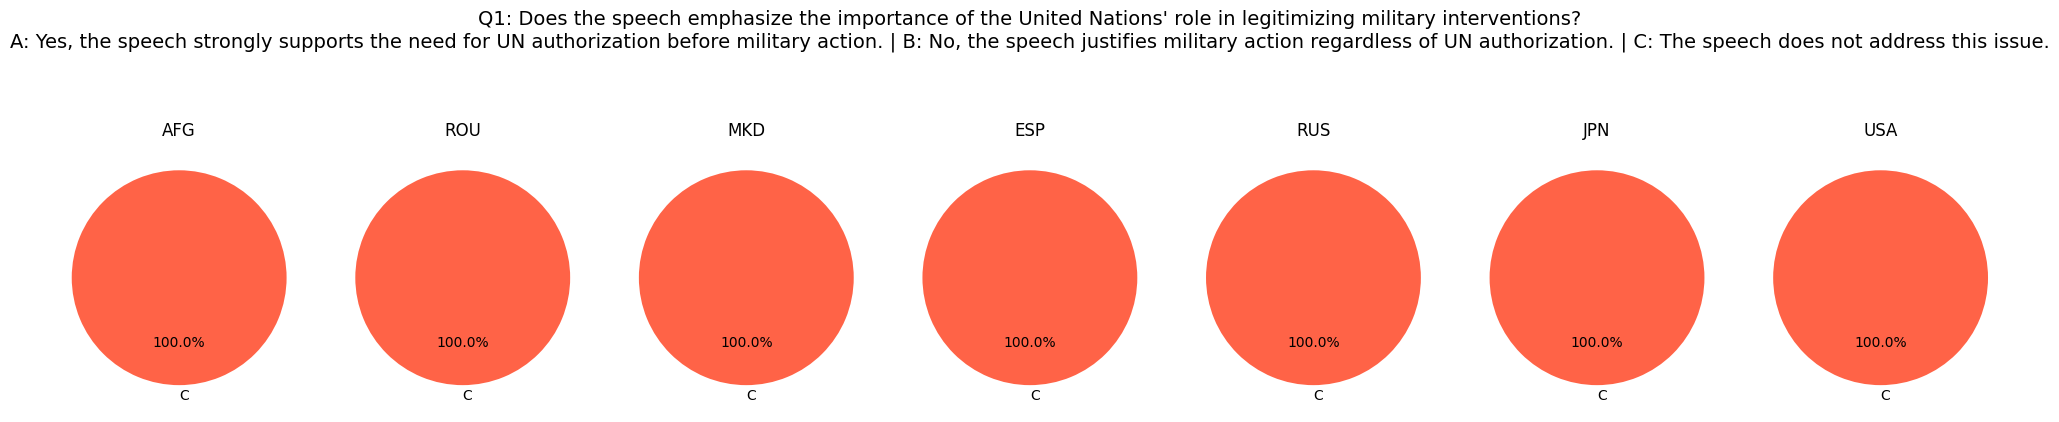

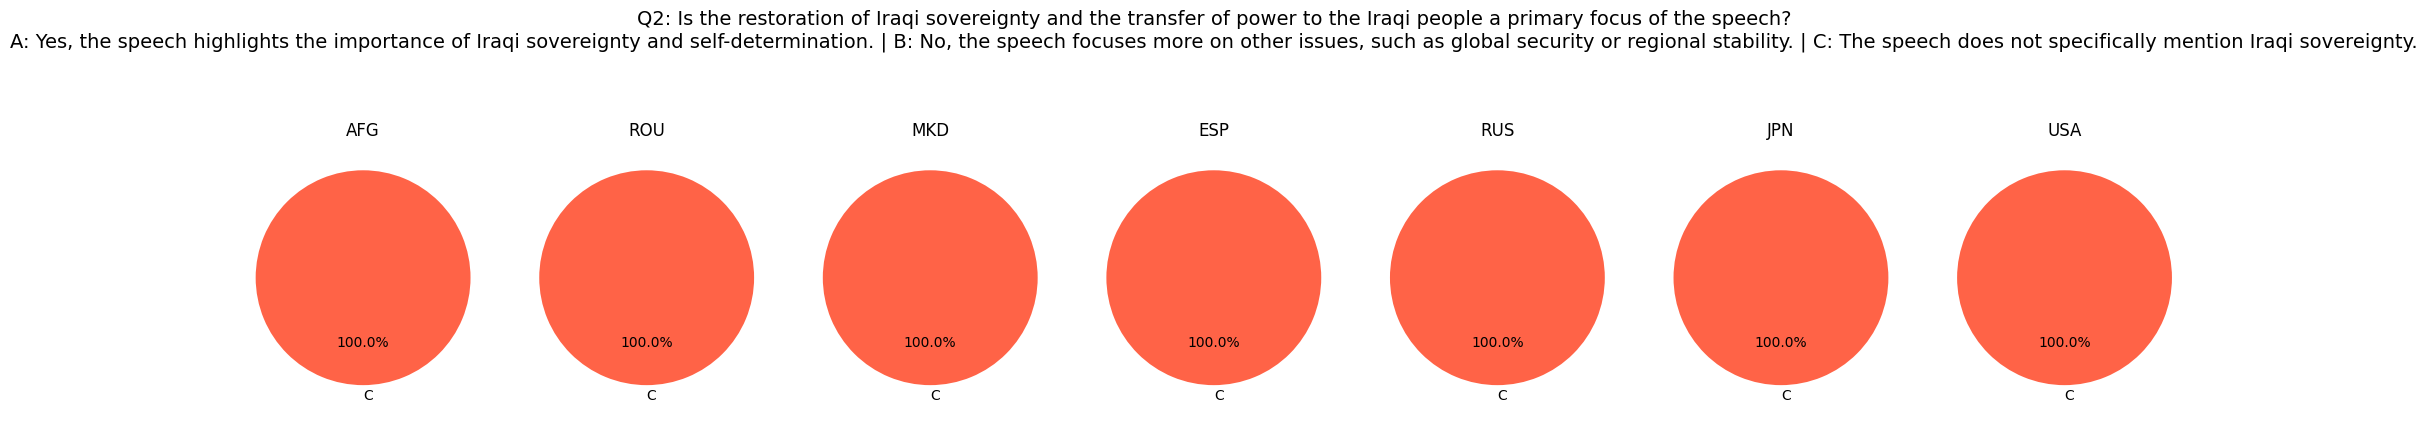

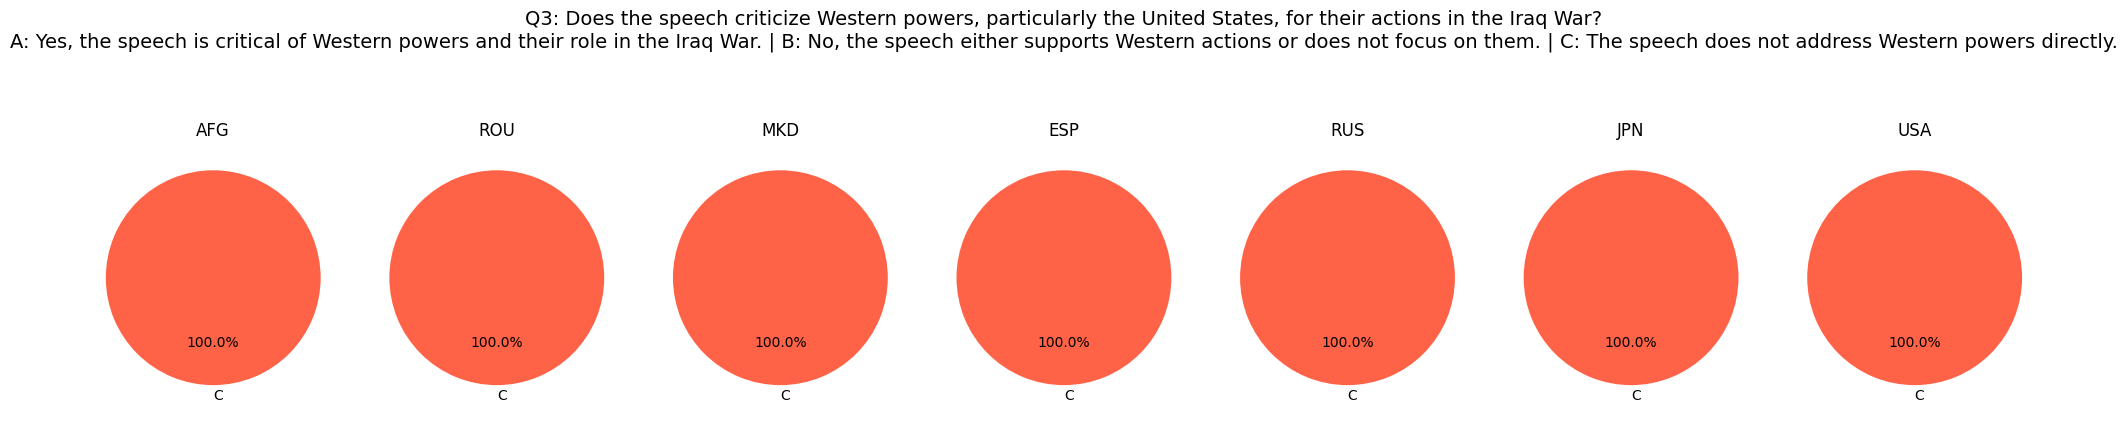

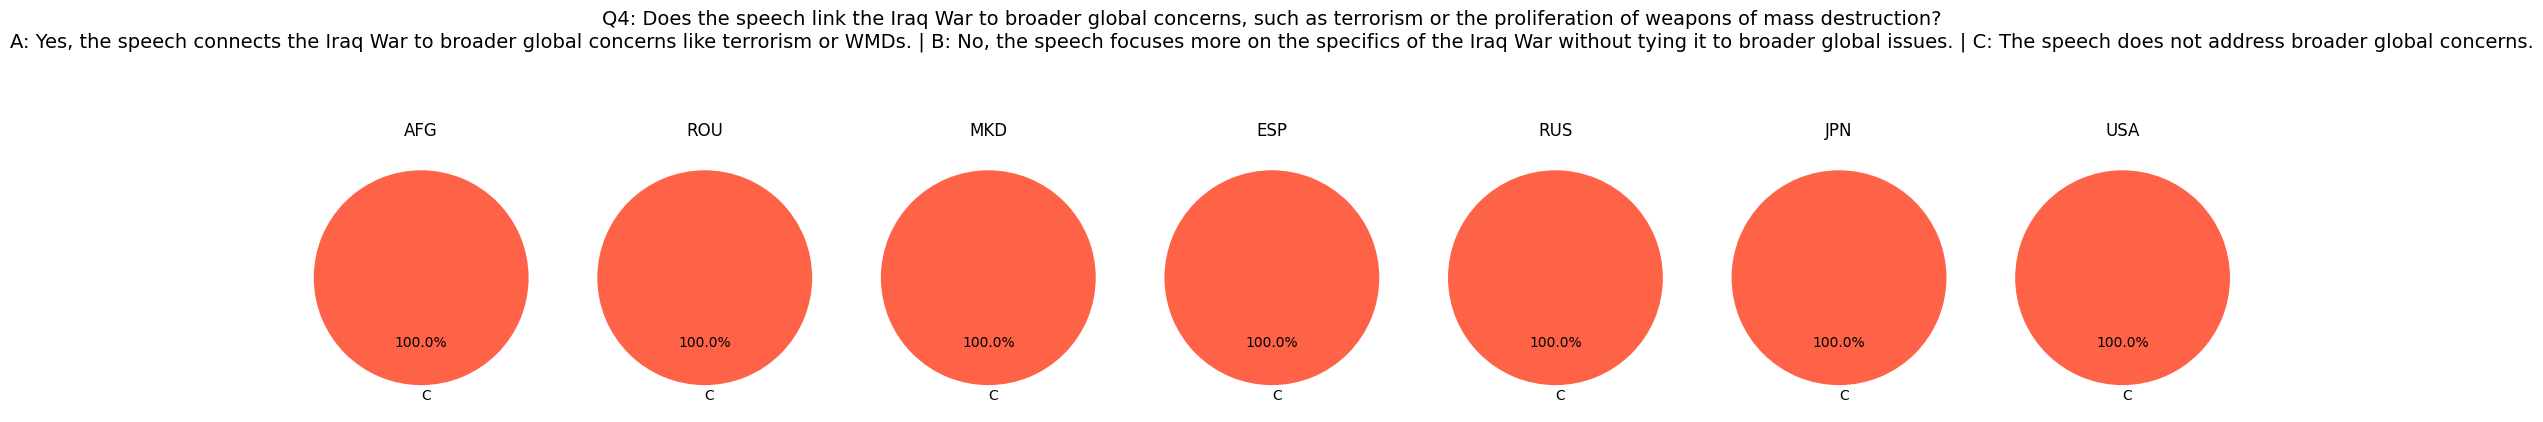

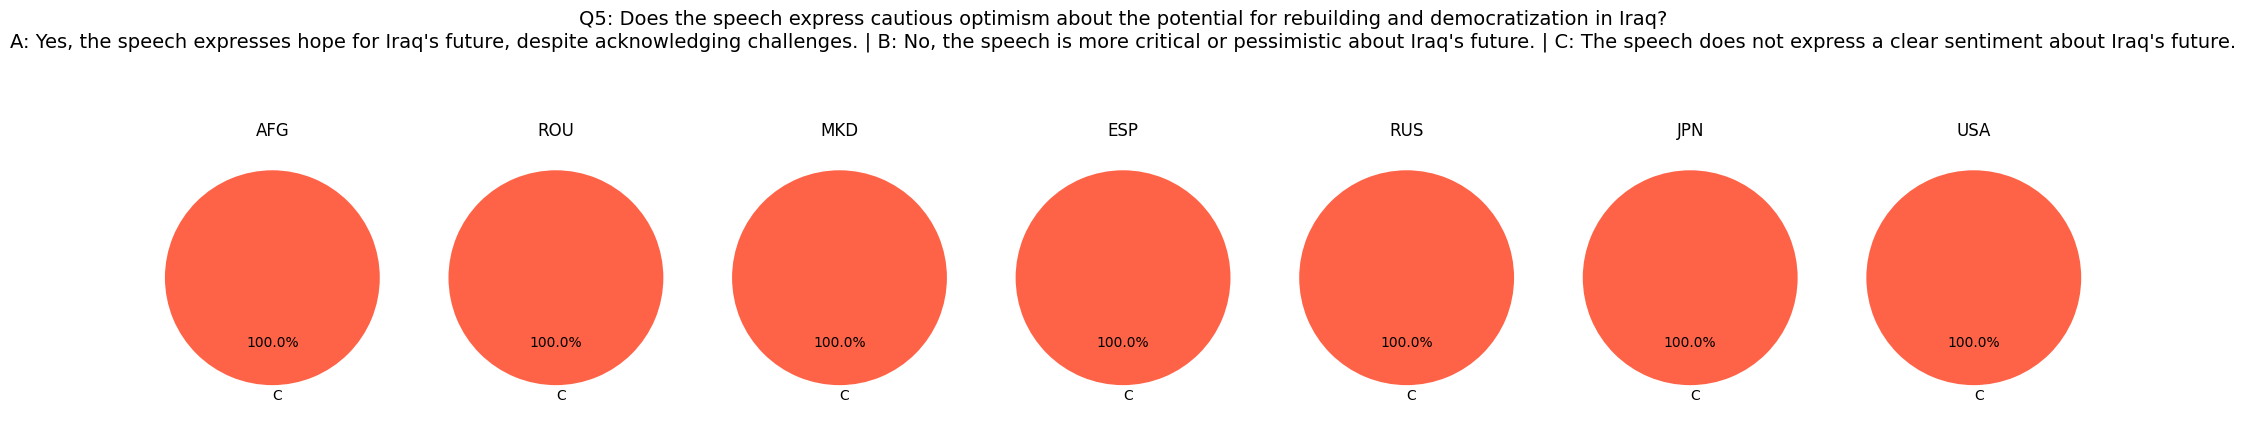

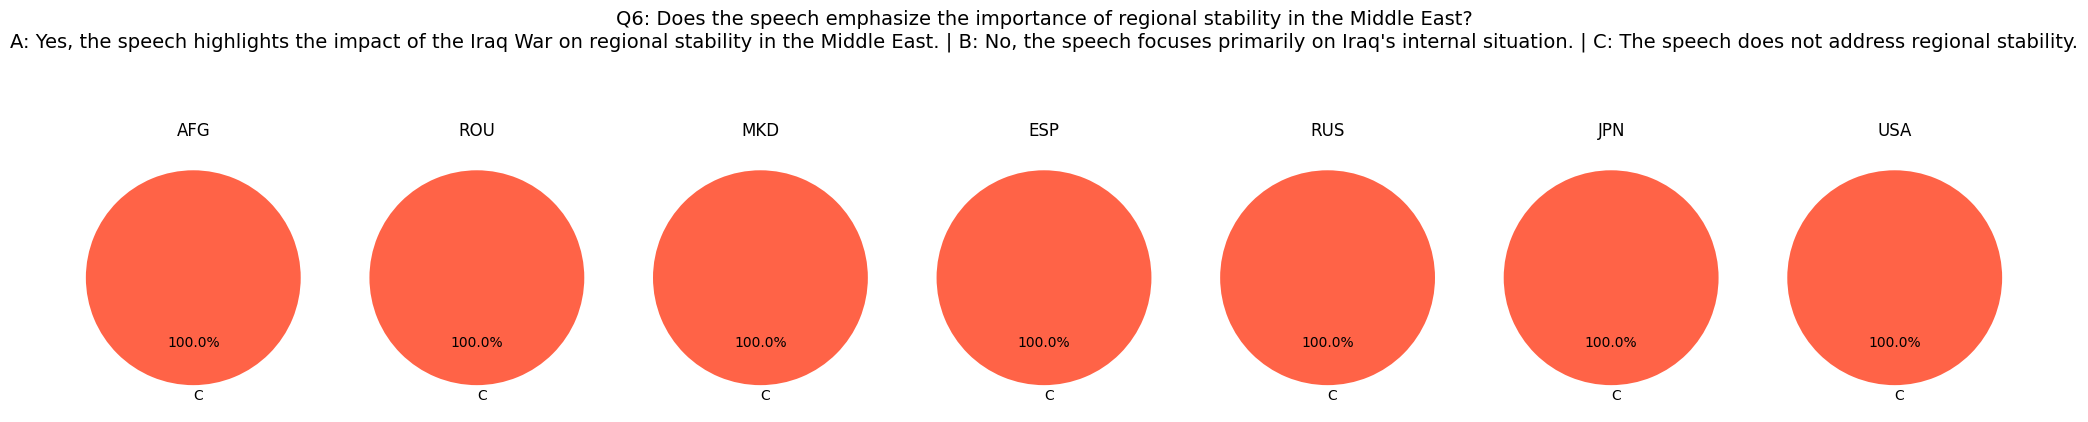

In [11]:
# List of specific countries for the chart (as per your request)
specific_countries = ['AFG', 'ROU', 'MKD', 'ESP', 'RUS', 'JPN', 'USA']

# Define color map for answers A, B, C
color_map = {'A': '#6A5ACD', 'B': '#48D1CC', 'C': '#FF6347'}

# Custom function to format the percentage display on the pie charts
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%' if pct > 0 else ''
    return my_format

# Iterate through each question in the `questions_data`
for question in questions_data:
    fig, axes = plt.subplots(1, len(specific_countries), figsize=(20, 5), subplot_kw={'aspect': 'equal'})
    
    # Retrieve question text and answer choices
    question_text = questions_data[question]['question']
    choices = questions_data[question]['choices']
    
    # Create the title including the question and choices
    title = f"{question}: {question_text}\n"
    title += f"A: {choices['A']} | B: {choices['B']} | C: {choices['C']}"
    
    fig.suptitle(title, fontsize=14)
    
    # Iterate through each country and create its pie chart
    for i, country in enumerate(specific_countries):
        # Filter the DataFrame for the current country
        country_data = df[df['country'] == country]
        
        # Get the answer for the current question (like 'Q1', 'Q2') and count occurrences
        answer_counts = country_data['Narrative_answers'].apply(lambda x: x.get(question, 'C')).value_counts()
        
        # Reindex the answer counts to ensure A, B, C are present, even if 0
        answer_counts = answer_counts.reindex(['A', 'B', 'C'], fill_value=0)
        
        # Colors for the current pie chart based on the answer keys
        colors = [color_map[option] for option in answer_counts.index]
        
        # Remove labels with 0% for cleaner display
        labels = [f'{idx}' if value > 0 else '' for idx, value in zip(answer_counts.index, answer_counts.values)]
        
        # Plot the pie chart for each country
        axes[i].pie(answer_counts, labels=labels, colors=colors, 
                    autopct=autopct_format(answer_counts), startangle=90)
        axes[i].set_title(country)
    
    plt.tight_layout()
    plt.show()


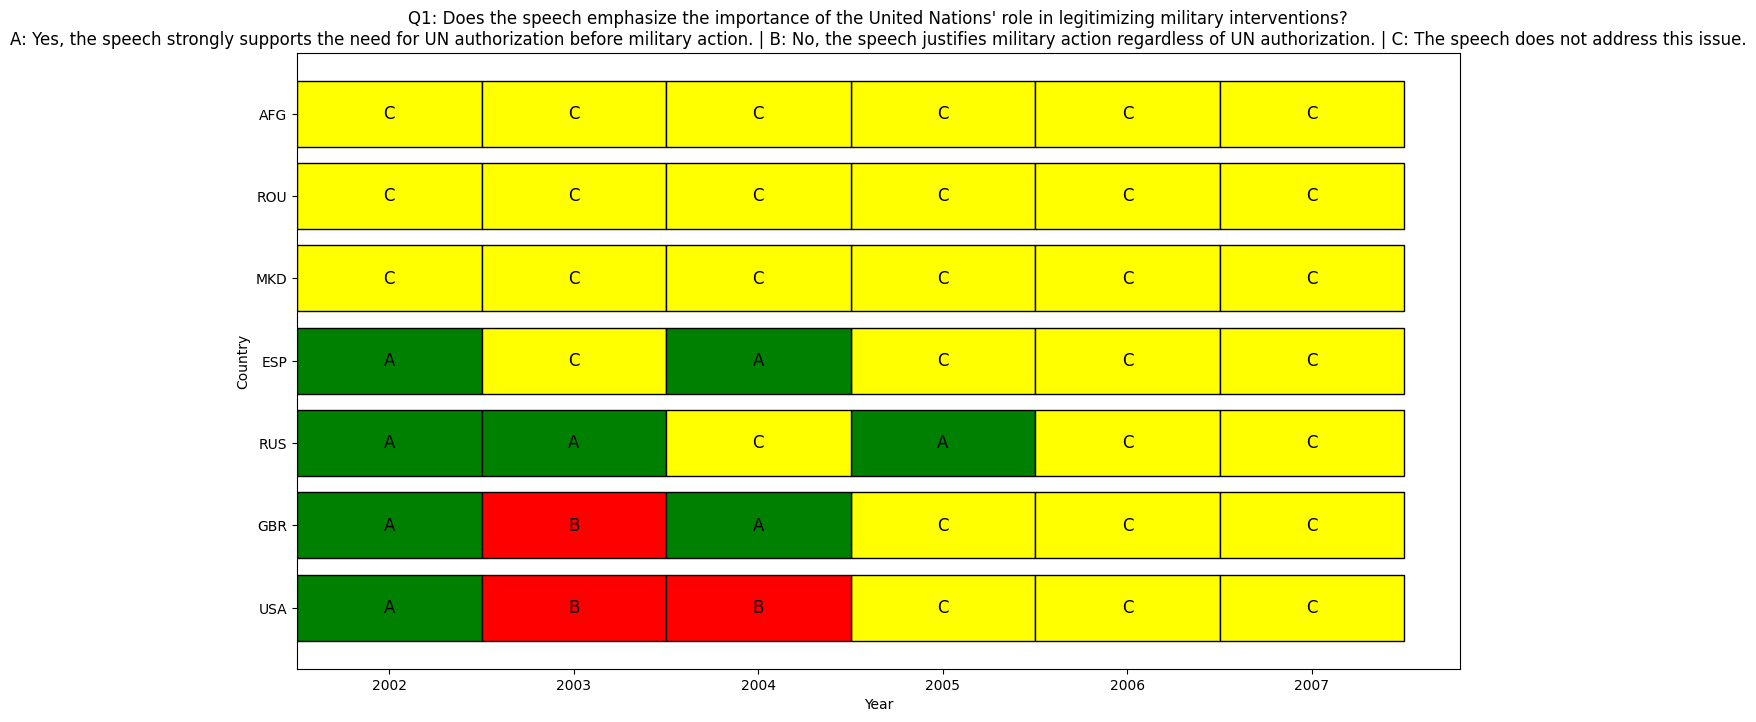

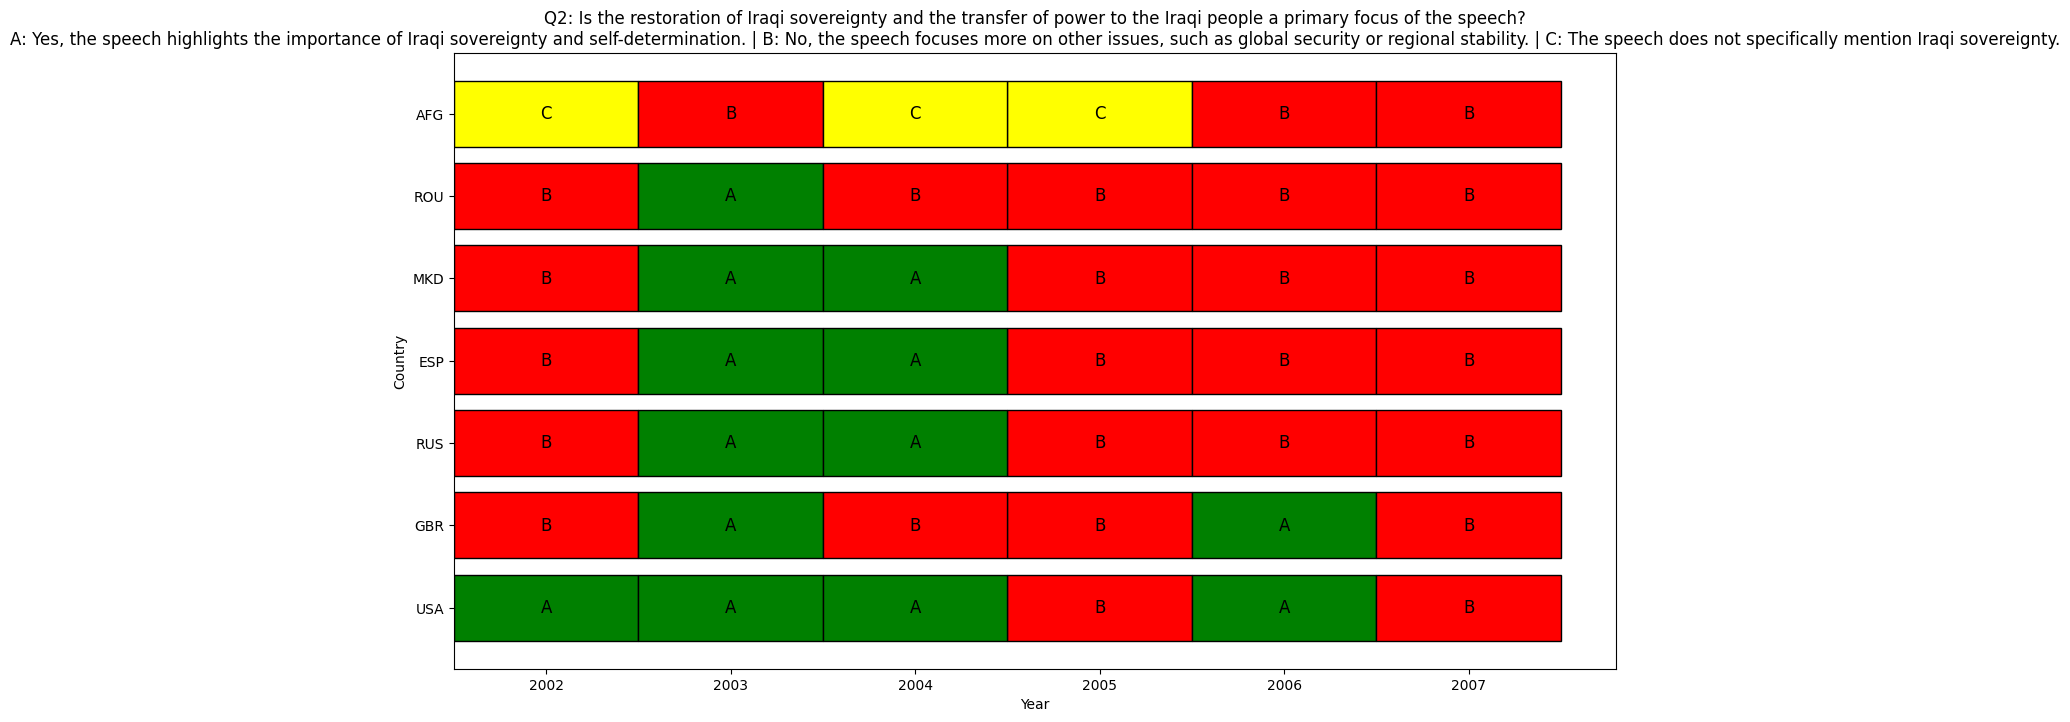

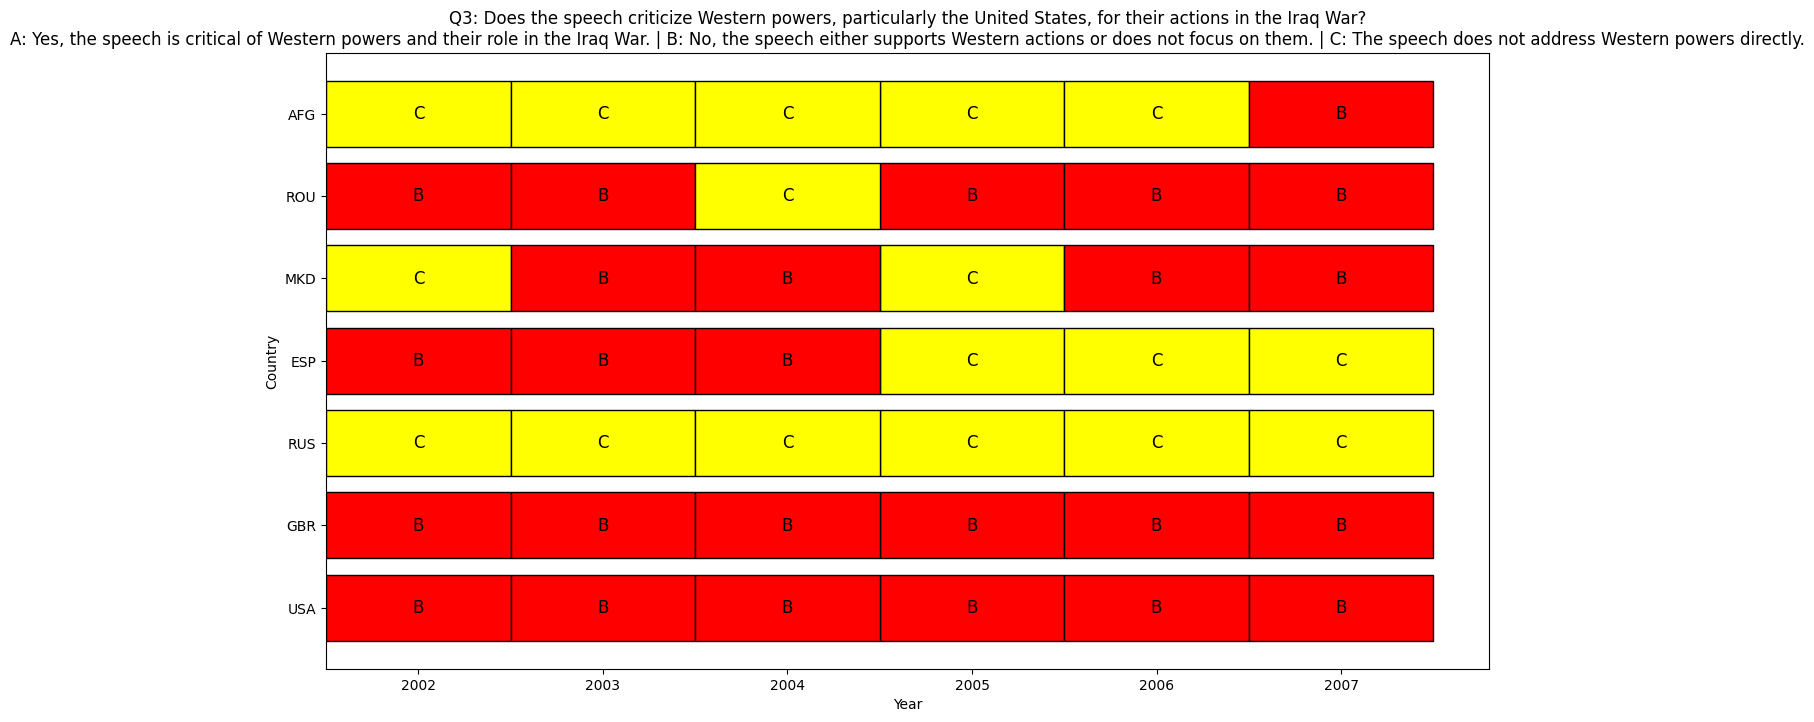

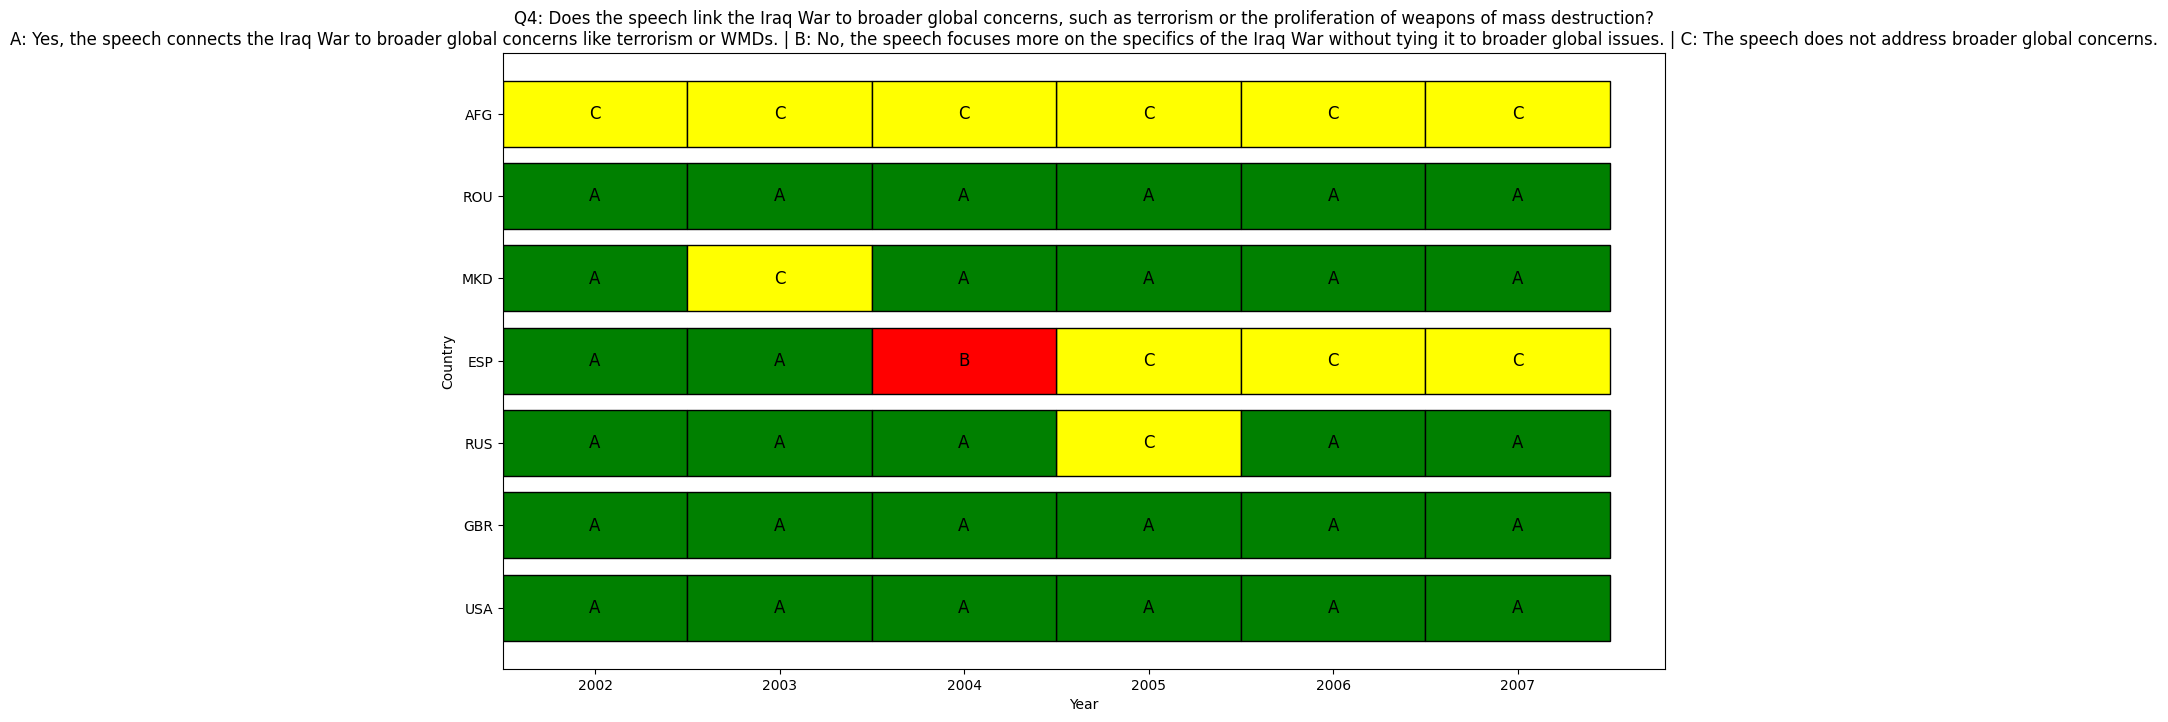

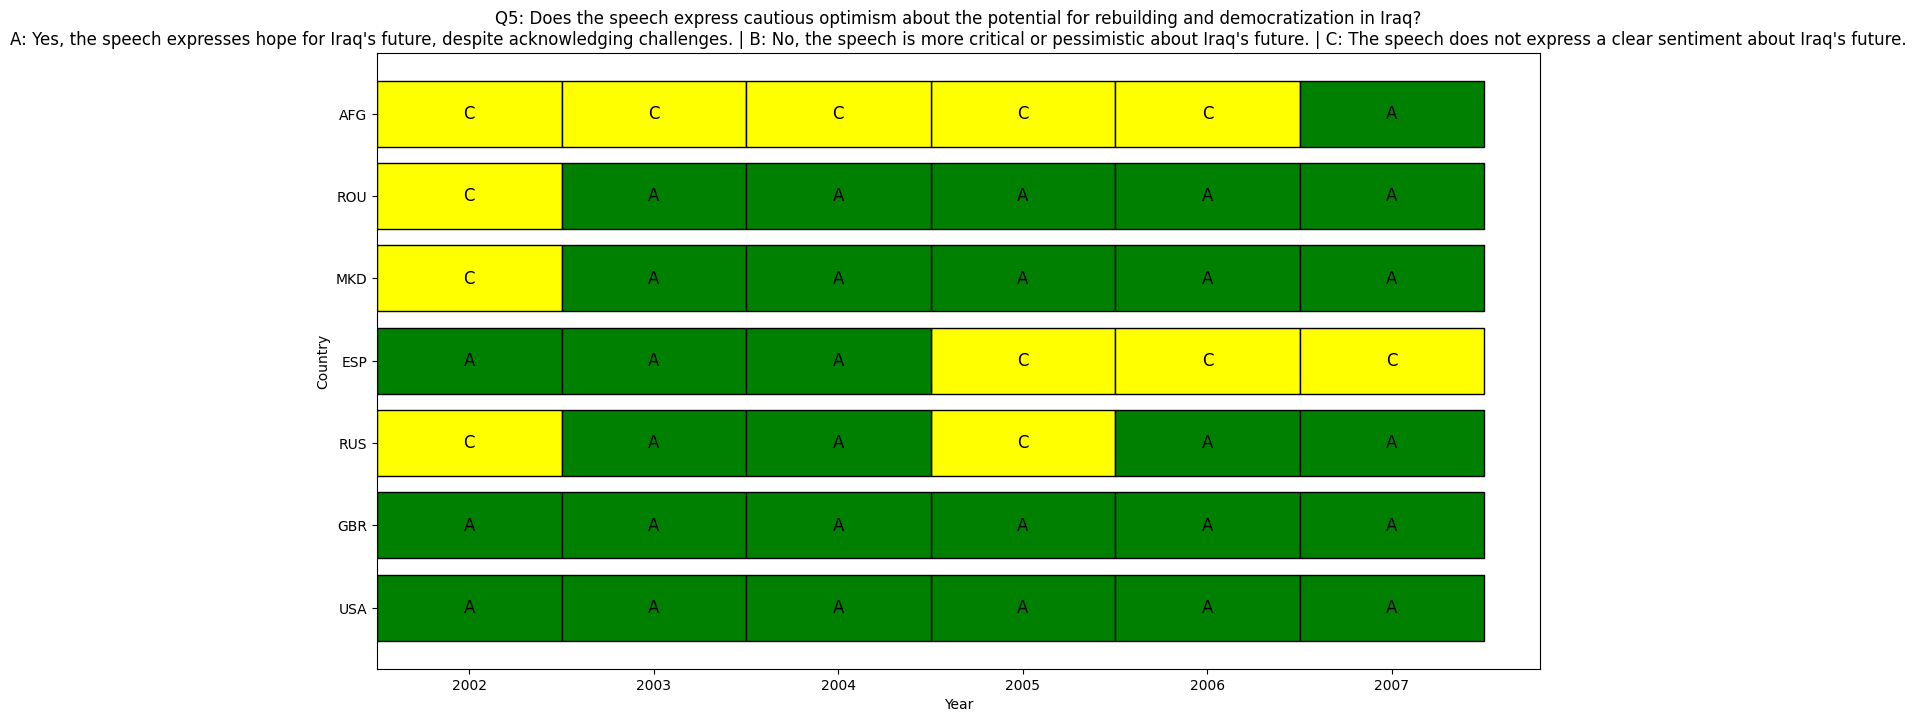

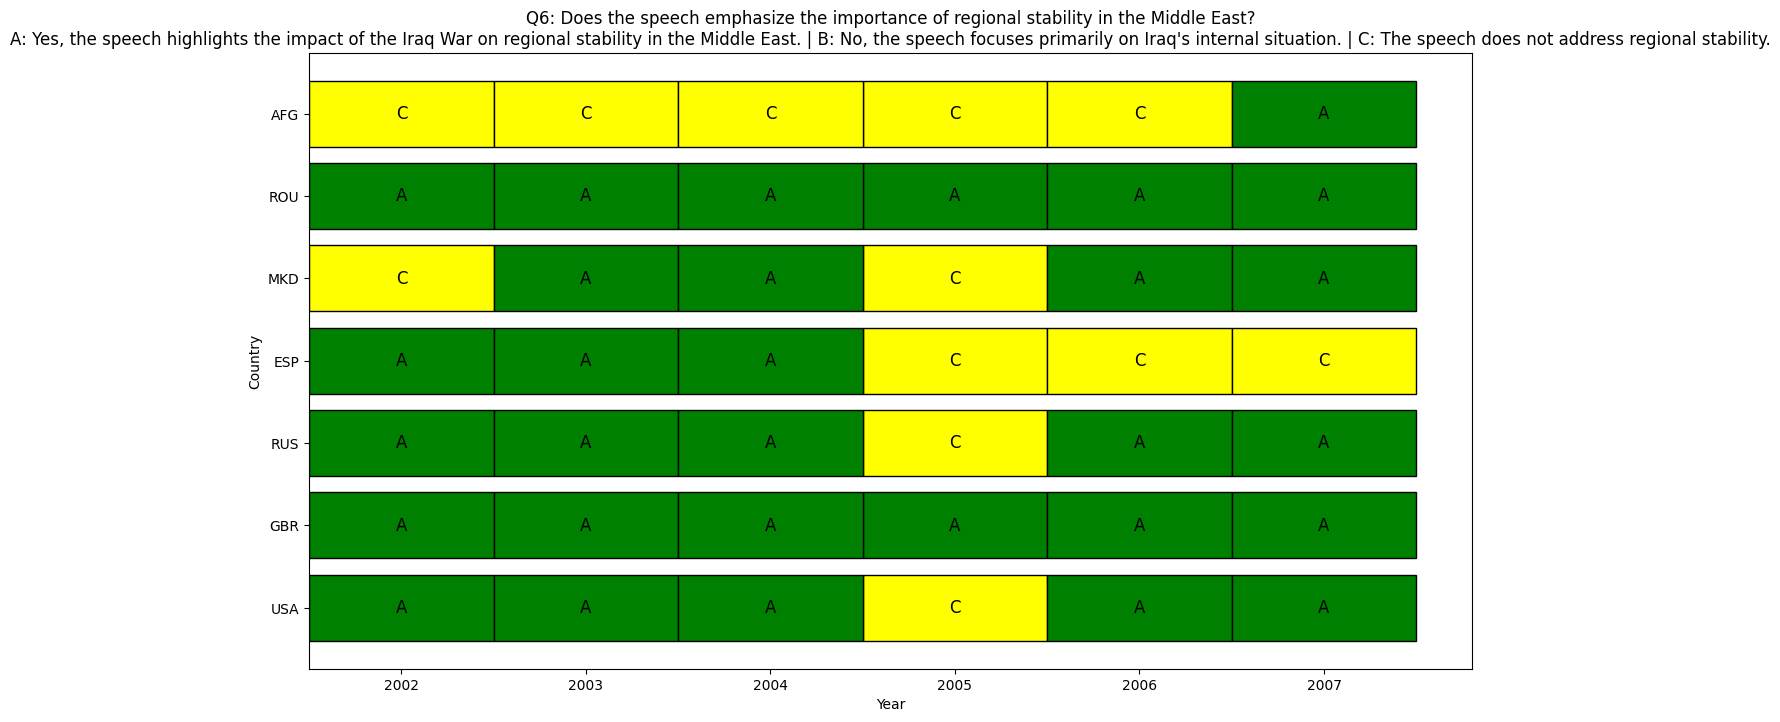

In [4]:
# Define color mapping for options
color_map = {'A': 'green', 'B': 'red', 'C': 'yellow'}

# List of unique questions
questions = list(questions_data.keys())

# List of unique countries
countries = ['USA', 'GBR', 'RUS','ESP','MKD','ROU','AFG']

# Iterate over each question
for question in questions:
    plt.figure(figsize=(15, 8))
    
    # Set up the y-ticks (countries)
    y_pos = np.arange(len(countries))
    
    # Iterate over each year
    for year in df['year'].unique():
        # Filter data for the current year
        year_data = df[df['year'] == year]
        
        # Get the answer counts for each country for the current question
        answers = year_data['Narrative_answers'].apply(lambda x: x[question[-1]])
        
        # Plot bars for each country based on the answers
        for i, country in enumerate(countries):
            if country in year_data['country'].values:
                country_answer = answers[year_data['country'] == country].values[0]
                plt.barh(i, 1, left=year - 0.5, color=color_map[country_answer], edgecolor='black')
                plt.text(year, i, country_answer, va='center', ha='center', color='black', fontsize=12)
    
    # Set x and y axis labels
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.yticks(y_pos, countries)
    plt.xticks(np.arange(df['year'].min(), df['year'].max() + 1))
    
    # Retrieve question text and options
    question_text = questions_data[question]['question']
    choices = questions_data[question]['choices']
    
    # Create the title including question and options
    title = f"{question}: {question_text}\n"
    title += f"A: {choices['A']} | B: {choices['B']} | C: {choices['C']}"
    
    # Set the title to the current question with options
    plt.title(title, fontsize=12)
    
    # Show the plot
    plt.show()

# Coalition of willing

In [5]:
coalition_of_willing_countries_list = ["United States",
    "Afghanistan", "Albania", "Australia", "Azerbaijan", "Bulgaria", "Colombia",
    "Czechia", "Denmark", "El Salvador", "Eritrea", "Estonia", "Ethiopia",
    "Georgia", "Hungary", "Iceland", "Italy", "Japan", "Korea, Republic of", "Latvia",
    "Lithuania", "North Macedonia", "Netherlands", "Nicaragua", "Philippines", "Poland",
    "Romania", "Slovakia", "Spain", "Türkiye", "United Kingdom", "Uzbekistan",
    "Costa Rica", "Dominican Republic", "Honduras", "Kuwait", "Marshall Islands",
    "Micronesia, Federated States of", "Mongolia", "Palau", "Portugal", "Rwanda", "Singapore",
    "Solomon Islands", "Uganda", "Panama", "Angola", "Tonga", "Ukraine"
]

In [10]:
with open("../data/processed/UN_data_with_narrative_answers.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
labels = df['country'].to_list()
countries = df['country'].to_list()
years = df['year'].to_list()

# Load the latent vectors
df_vectors = pd.read_csv("../data/processed/latent_vector_3.csv", header=None)

#add the year and countries column to the latent vectors
df_vectors['year'] = years
df_vectors['country'] = countries

# Define the Euclidean distance function
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2)**2))

# Create a new column 'distance'
df_vectors['distance'] = np.nan

# Iterate over each row in the dataframe
for i, row in df_vectors.iterrows():
    # Get the current country's latent vector and year
    current_vector = row[[0, 1, 2]].values
    current_year = row['year']
    current_country = row['country']
    
    # Get the US vector for the same year
    us_vector = df_vectors[(df_vectors['year'] == current_year) & (df_vectors['country'] == 'USA')].iloc[0][[0, 1, 2]].values
    distance = euclidean_distance(current_vector, us_vector)
    
    # Assign the distance to the DataFrame and format to avoid scientific notation
    df_vectors.at[i, 'distance'] = f'{distance:.10f}'

/var/folders/rt/wydyk1yn1096_jp1cjy1506m0000gn/T/ipykernel_84209/3043143521.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.2206112350' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_vectors.at[i, 'distance'] = f'{distance:.10f}'


# Top 10% for each year by distance

In [10]:
def get_top_10_percent_countries(df, year, top_percent=10):
    df_vectors = df[df['year'] == year]
    num_rows = int(len(df_vectors) * (top_percent / 100))
    top_percent_countries = df_vectors.sort_values('distance',ascending=True).head(num_rows)
    country_names = {country.alpha_3: country.name for country in pycountry.countries}
    top_percent_countries['country'] = top_percent_countries['country'].map(country_names)
    top_percent_countries['match'] = top_percent_countries['country'].apply(lambda x: x in coalition_of_willing_countries_list)
    return top_percent_countries

In [11]:
get_top_10_percent_countries(df_vectors, 2002)

,0,1,2,year,country,distance,match
187,2.336530,-1.430675,0.478516,2002,United States,0.0000000000,True
138,1.762146,-1.811266,0.627617,2002,Spain,0.7049805465,True
17,1.762139,-1.811261,0.627613,2002,United Kingdom,0.7049829527,True
98,1.762140,-1.811266,0.627620,2002,Philippines,0.7049860344,True
184,1.762140,-1.811273,0.627614,2002,Italy,0.7049887082,True
136,1.762128,-1.811271,0.627611,2002,Kuwait,0.7049971419,True
44,1.762103,-1.811272,0.627608,2002,Palau,0.7050163245,True
4,2.181142,-1.938499,0.000992,2002,Netherlands,0.7141847151,True
101,2.553098,-1.282285,-0.403964,2002,Denmark,0.9207016785,True
162,3.153799,-0.675330,-0.110265,2002,Bulgaria,1.2590221091,True


In [12]:
get_top_10_percent_countries(df_vectors, 2003)

,0,1,2,year,country,distance,match
432,1.796021,-2.072696,4.125690,2003,United States,0.0000000000,True
555,1.796025,-2.072687,4.125698,2003,United Kingdom,0.0000127665,True
527,0.656038,-0.903048,2.091213,2003,Estonia,2.6089713066,True
502,0.656022,-0.903037,2.091221,2003,Latvia,2.6089775682,True
536,0.656016,-0.903043,2.091197,2003,Albania,2.6089954338,True
374,0.656030,-0.903038,2.091187,2003,Ukraine,2.6089997849,True
444,1.308795,-0.573039,1.886416,2003,Poland,2.7387421094,True
524,1.308813,-0.573047,1.886405,2003,Czechia,2.7387434120,True
519,1.308826,-0.573037,1.886401,2003,Dominican Republic,2.7387502238,True
548,1.308793,-0.573039,1.886393,2003,Romania,2.7387610290,True


In [13]:
get_top_10_percent_countries(df_vectors, 2004)

,0,1,2,year,country,distance,match
711,1.796017,-2.072693,4.125691,2004,United States,0.0000000000,True
639,1.308793,-0.573035,1.886417,2004,Czechia,2.7387418775,True
702,1.308797,-0.573049,1.886395,2004,Albania,2.7387522309,True
634,1.308814,-0.573025,1.886402,2004,Iceland,2.7387555512,True
637,1.308810,-0.573022,1.886404,2004,Hungary,2.7387572329,True
604,1.308802,-0.573032,1.886397,2004,Türkiye,2.7387581093,True
613,1.308795,-0.573038,1.886395,2004,"Korea, Republic of",2.7387587844,True
737,1.308796,-0.573032,1.886396,2004,North Macedonia,2.7387600885,True
718,1.308804,-0.573026,1.886394,2004,Australia,2.7387641435,True
726,1.308791,-0.573028,1.886394,2004,Slovakia,2.7387656162,True


In [15]:
get_top_10_percent_countries(df_vectors, 2005)

,0,1,2,year,country,distance,match
352,1.180692,-0.644311,-0.096804,2005,United States,0.0000000000,True
235,1.137599,-0.581384,-0.127810,2005,North Macedonia,0.0823296296,True
314,1.425609,-0.800597,-0.429256,2005,"Korea, Republic of",0.4415136033,True
301,1.186621,-0.254399,-0.557173,2005,El Salvador,0.6033293647,True
346,-0.635200,-0.571692,0.032645,2005,Italy,1.8219474901,True
304,-0.735198,-0.571695,0.032645,2005,Latvia,1.9216307192,True
327,-0.735200,-0.571701,0.032651,2005,Netherlands,1.9216329035,True
233,-0.735200,-0.571701,0.032651,2005,Uzbekistan,1.9216329035,True
188,-0.735200,-0.571701,0.032651,2005,Spain,1.9216329035,True
354,-0.735204,-0.571691,0.032639,2005,Slovakia,1.9216365555,True


In [16]:
get_top_10_percent_countries(df_vectors, 2006)

,0,1,2,year,country,distance,match
925,1.308809,-0.573041,1.886399,2006,United States,0.0000000000,True
782,1.308800,-0.573024,1.886394,2006,United Kingdom,0.0000197554,True
888,0.656030,-0.903043,2.091210,2006,Romania,0.7595844800,True
836,0.656027,-0.903046,2.091195,2006,North Macedonia,0.7595845312,True
812,0.656024,-0.903044,2.091220,2006,Denmark,0.7595937045,True
881,-0.401005,0.611108,1.824029,2006,Hungary,2.0807600081,True
760,-0.401005,0.611108,1.824027,2006,Japan,2.0807605339,True
787,-0.401006,0.611109,1.824027,2006,"Korea, Republic of",2.0807616545,True
916,0.487826,1.000534,0.700980,2006,Türkiye,2.1343310295,True
937,-0.373043,0.786143,1.479388,2006,Bulgaria,2.2003785303,True


In [17]:
get_top_10_percent_countries(df_vectors, 2007)

,0,1,2,year,country,distance,match
993,0.656029,-0.903040,2.091217,2007,United States,0.0000000000,True
980,0.656033,-0.903043,2.091209,2007,United Kingdom,0.0000089323,True
962,0.656029,-0.903049,2.091192,2007,North Macedonia,0.0000263321,True
963,0.656026,-0.903046,2.091178,2007,Romania,0.0000393347,True
1089,-0.401006,0.611107,1.824027,2007,Japan,1.8658390583,True
1110,-0.401005,0.611108,1.824027,2007,Bulgaria,1.8658395552,True
977,-0.134916,0.917180,1.994385,2007,Kuwait,1.9870007883,True
1075,-0.373044,0.786142,1.479386,2007,Iceland,2.0704260955,True
976,-0.914467,0.775753,1.594486,2007,Italy,2.3519241044,True
952,-0.914468,0.775752,1.594485,2007,Mongolia,2.3519245076,True


In [14]:
df_vectors.to_csv("../data/processed/latent_vector_3_with_euclidian_distance.csv", index=False)